In [1]:
!pip install wrds

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import wrds
from datetime import datetime
from google.colab import auth
import pandas as pd
from google.cloud import bigquery

In [8]:
# Display first few rows to verify
print("\nFirst few rows of the dataframe:")
print(df.head())


First few rows of the dataframe:
                       date       ret     prc    shrout ticker  permno  \
0 2002-06-01 00:00:00+00:00  0.023585   10.85   8976000    HUN   62287   
1 2010-02-01 00:00:00+00:00  0.074733    3.02  45587000   HTRN   87451   
2 2017-01-01 00:00:00+00:00 -0.014881   23.17  74886000     HW   86042   
3 2022-04-01 00:00:00+00:00 -0.107090  313.84   6801000    XLG   17731   
4 2007-01-01 00:00:00+00:00  0.006858  108.64   4750000    XLG   90694   

    month      mktcap  gvkey  CRSP_YEAR  ...  oancf sale  cogs  xint  xsga  \
0  200206    97.38960   5782       2002  ...    NaN  NaN   NaN   NaN   NaN   
1  201002   137.67274   2589       2010  ...    NaN  NaN   NaN   NaN   NaN   
2  201701  1735.10862  61576       2017  ...    NaN  NaN   NaN   NaN   NaN   
3  202204  2134.42584   <NA>       2022  ...    NaN  NaN   NaN   NaN   NaN   
4  200701   516.04000   <NA>       2007  ...    NaN  NaN   NaN   NaN   NaN   

   be  op  year  at_lag  inv  
0 NaN NaN  <NA>     N

In [9]:
# Display dataframe info
print("\nDataframe info:")
print(df.info())


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517096 entries, 0 to 517095
Data columns (total 33 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   date       517096 non-null  datetime64[us, UTC]
 1   ret        516966 non-null  float64            
 2   prc        517072 non-null  float64            
 3   shrout     517096 non-null  Int64              
 4   ticker     517096 non-null  object             
 5   permno     517096 non-null  Int64              
 6   month      517096 non-null  Int64              
 7   mktcap     517072 non-null  float64            
 8   gvkey      502973 non-null  Int64              
 9   CRSP_YEAR  517096 non-null  Int64              
 10  index      425921 non-null  Int64              
 11  datadate   425921 non-null  datetime64[us, UTC]
 12  seq        418882 non-null  float64            
 13  ceq        418413 non-null  float64            
 14  at         418882 n

In [10]:
# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [11]:
first_10_rows = df[:10]

In [12]:
print(first_10_rows)

                       date       ret       prc    shrout ticker  permno  \
0 2002-06-01 00:00:00+00:00  0.023585   10.8500   8976000    HUN   62287   
1 2010-02-01 00:00:00+00:00  0.074733    3.0200  45587000   HTRN   87451   
2 2017-01-01 00:00:00+00:00 -0.014881   23.1700  74886000     HW   86042   
3 2022-04-01 00:00:00+00:00 -0.107090  313.8400   6801000    XLG   17731   
4 2007-01-01 00:00:00+00:00  0.006858  108.6400   4750000    XLG   90694   
5 2007-12-01 00:00:00+00:00 -0.007280  110.5300   5850000    XLG   90694   
6 2011-06-01 00:00:00+00:00 -0.013916   92.3492   4251000    XLG   90694   
7 2013-03-01 00:00:00+00:00  0.028757  111.2600   5050000    XLG   90694   
8 2004-01-01 00:00:00+00:00 -0.113402    5.1600  13414000   WORK   86200   
9 2018-04-01 00:00:00+00:00  0.036910   12.0800  54915000   XCRA   48291   

    month       mktcap   gvkey  CRSP_YEAR  ...  oancf sale  cogs  xint  xsga  \
0  200206    97.389600    5782       2002  ...    NaN  NaN   NaN   NaN   NaN   
1  

In [13]:
# Sort by permno and date
df = df.sort_values(by=['permno', 'date']).reset_index(drop=True)

In [14]:
first_10_rows = df[:10]

In [15]:
print(first_10_rows)

                       date       ret     prc   shrout ticker  permno   month  \
0 2002-05-01 00:00:00+00:00  0.004132  12.150  8749000   BTFG   10002  200205   
1 2002-06-01 00:00:00+00:00  0.010126  12.150  8749000   BTFG   10002  200206   
2 2002-07-01 00:00:00+00:00 -0.094650  11.000  8749000   BTFG   10002  200207   
3 2002-08-01 00:00:00+00:00  0.022727  11.250  8757000   BTFG   10002  200208   
4 2002-09-01 00:00:00+00:00 -0.039646  10.689  8740000   BTFG   10002  200209   
5 2002-10-01 00:00:00+00:00  0.009449  10.790  8740000   BTFG   10002  200210   
6 2002-11-01 00:00:00+00:00 -0.017609  10.600  8739000   BTFG   10002  200211   
7 2002-12-01 00:00:00+00:00  0.059025  11.100  8729000   BTFG   10002  200212   
8 2003-01-01 00:00:00+00:00  0.063964  11.810  8729000   BTFG   10002  200301   
9 2003-02-01 00:00:00+00:00  0.121931  13.250  8729000   BTFG   10002  200302   

      mktcap  gvkey  CRSP_YEAR  ...  oancf sale  cogs  xint  xsga  be  op  \
0  106.30035  19049       2002 

In [16]:
# Calculate lagged market equity (to be used as weights)
df['Lme'] = df.groupby('permno')['mktcap'].shift(1)

In [17]:
first_10_rows = df[:10]

In [18]:
print(first_10_rows)

                       date       ret     prc   shrout ticker  permno   month  \
0 2002-05-01 00:00:00+00:00  0.004132  12.150  8749000   BTFG   10002  200205   
1 2002-06-01 00:00:00+00:00  0.010126  12.150  8749000   BTFG   10002  200206   
2 2002-07-01 00:00:00+00:00 -0.094650  11.000  8749000   BTFG   10002  200207   
3 2002-08-01 00:00:00+00:00  0.022727  11.250  8757000   BTFG   10002  200208   
4 2002-09-01 00:00:00+00:00 -0.039646  10.689  8740000   BTFG   10002  200209   
5 2002-10-01 00:00:00+00:00  0.009449  10.790  8740000   BTFG   10002  200210   
6 2002-11-01 00:00:00+00:00 -0.017609  10.600  8739000   BTFG   10002  200211   
7 2002-12-01 00:00:00+00:00  0.059025  11.100  8729000   BTFG   10002  200212   
8 2003-01-01 00:00:00+00:00  0.063964  11.810  8729000   BTFG   10002  200301   
9 2003-02-01 00:00:00+00:00  0.121931  13.250  8729000   BTFG   10002  200302   

      mktcap  gvkey  CRSP_YEAR  ...  sale cogs  xint  xsga  be  op  year  \
0  106.30035  19049       2002  

In [19]:
# Drop rows with missing or zero lagged market equity
df = df.dropna(subset=['Lme'])
df = df[df['Lme'] > 0]

In [20]:
# Value-weighted returns
vwret = df.groupby('date').apply(lambda x: np.sum(x['Lme'] / x['Lme'].sum() * x['ret']))
vwret = vwret.to_frame(name='vwret')

<ipython-input-20-26c6521bf239>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vwret = df.groupby('date').apply(lambda x: np.sum(x['Lme'] / x['Lme'].sum() * x['ret']))


In [21]:
# Equal-weighted returns
ewret = df.groupby('date')['ret'].mean()
ewret = ewret.to_frame(name='ewret')

In [ ]:
# Aggregate market equity
mktcap = df.groupby('date')['me'].sum().to_frame().rename(columns={'me': 'mktcap'})

In [27]:
import matplotlib.pyplot as plt

Processing data...
Calculating size factor...
Calculating BE/ME factor...
Calculating operating profitability factor...
Calculating investment factor...
Combining classifications...
Calculating portfolio returns...


<ipython-input-28-09c9158ef236>:121: RuntimeWarning: invalid value encountered in scalar divide
  .apply(lambda x: np.sum(x['ret'] * x['Lme']) / x['Lme'].sum())
<ipython-input-28-09c9158ef236>:121: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: np.sum(x['ret'] * x['Lme']) / x['Lme'].sum())


Calculating final factors...


<ipython-input-28-09c9158ef236>:189: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ff5_factors = portfolio_returns.groupby('date').apply(calculate_ff5_factors)
<ipython-input-28-09c9158ef236>:192: RuntimeWarning: invalid value encountered in scalar divide
  vwret = df.groupby('date').apply(lambda x: np.sum(x['ret'] * x['Lme']) / x['Lme'].sum())
<ipython-input-28-09c9158ef236>:192: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to sile


Fama-French 5 Factor Summary Statistics:
              SMB         HML         RMW         CMA         MKT
count  310.000000  310.000000  310.000000  310.000000  310.000000
mean    -0.001540   -0.003728    0.000690   -0.002115    0.007610
std      0.029358    0.028481    0.033293    0.020633    0.045618
min     -0.149992   -0.164617   -0.162935   -0.151433   -0.171368
25%     -0.014176   -0.018973   -0.014490   -0.009937   -0.017871
50%     -0.003457   -0.001816    0.000577   -0.001904    0.014044
75%      0.012190    0.010389    0.016705    0.006589    0.036663
max      0.149597    0.080252    0.134999    0.083430    0.140166


<Figure size 1500x1000 with 0 Axes>

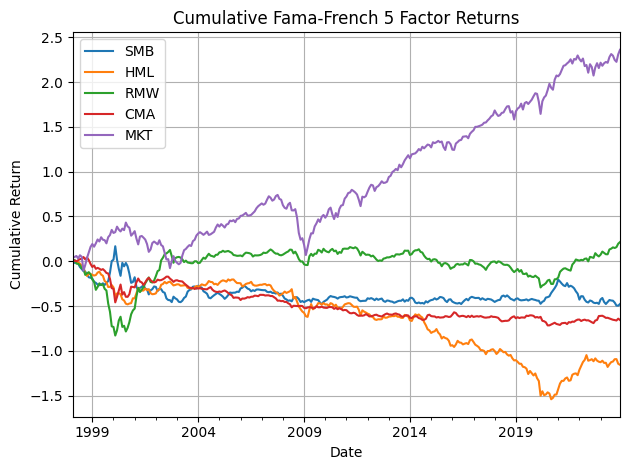


Factors saved to 'ff5_factors.csv'

Factor Correlations:
          SMB       HML       RMW       CMA       MKT
SMB  1.000000 -0.192890 -0.437843 -0.697347  0.304291
HML -0.192890  1.000000  0.642573  0.127367  0.198437
RMW -0.437843  0.642573  1.000000  0.520310  0.003910
CMA -0.697347  0.127367  0.520310  1.000000 -0.220374
MKT  0.304291  0.198437  0.003910 -0.220374  1.000000


In [28]:
def calculate_size_factor(data):
    """Calculate size factor using June market caps"""
    size = (
        data[data['date'].dt.month == 6]
        .assign(
            year=lambda x: x['date'].dt.year,
            size=lambda x: x['mktcap'],
            sorting_date=lambda x: x['date'] + pd.DateOffset(months=1)
        )
        [['permno', 'year', 'size', 'sorting_date']]
    )

    # Calculate median breakpoint using all stocks
    size_breakpoints = (
        size.groupby('year')['size']
        .median()
        .to_frame('size_breakpoint')
    )

    size = size.merge(size_breakpoints, left_on='year', right_index=True)
    size['size_group'] = np.where(size['size'] <= size['size_breakpoint'], 'S', 'B')

    return size[['permno', 'year', 'size_group', 'sorting_date']]

def calculate_beme_factor(data):
    """Calculate book-to-market factor"""
    # Calculate BE/ME using December market cap and book equity
    beme = (
        data[data['date'].dt.month == 12]
        .assign(
            year=lambda x: x['date'].dt.year,
            beme=lambda x: x['be'] / x['mktcap']
        )
        .dropna(subset=['beme'])
    )

    # Calculate breakpoints (30th and 70th percentiles)
    breakpoints = (
        beme.groupby('year')['beme']
        .quantile([0.3, 0.7])
        .unstack()
        .rename(columns={0.3: 'beme_low', 0.7: 'beme_high'})
    )

    beme = beme.merge(breakpoints, left_on='year', right_index=True)

    beme['beme_group'] = np.where(
        beme['beme'] <= beme['beme_low'], 'L',
        np.where(beme['beme'] > beme['beme_high'], 'H', 'M')
    )

    return beme[['permno', 'year', 'beme_group']]

def calculate_op_factor(data):
    """Calculate operating profitability factor"""
    op = (
        data[data['date'].dt.month == 12]
        .assign(
            year=lambda x: x['date'].dt.year,
            op_ratio=lambda x: x['op'] / x['be']
        )
        .dropna(subset=['op_ratio'])
    )

    # Calculate breakpoints
    breakpoints = (
        op.groupby('year')['op_ratio']
        .quantile([0.3, 0.7])
        .unstack()
        .rename(columns={0.3: 'op_low', 0.7: 'op_high'})
    )

    op = op.merge(breakpoints, left_on='year', right_index=True)

    op['op_group'] = np.where(
        op['op_ratio'] <= op['op_low'], 'W',
        np.where(op['op_ratio'] > op['op_high'], 'R', 'M')
    )

    return op[['permno', 'year', 'op_group']]

def calculate_inv_factor(data):
    """Calculate investment factor"""
    inv = (
        data[data['date'].dt.month == 12]
        .assign(
            year=lambda x: x['date'].dt.year,
            inv_ratio=lambda x: x['inv'] / x['at_lag']
        )
        .dropna(subset=['inv_ratio'])
    )

    # Calculate breakpoints
    breakpoints = (
        inv.groupby('year')['inv_ratio']
        .quantile([0.3, 0.7])
        .unstack()
        .rename(columns={0.3: 'inv_low', 0.7: 'inv_high'})
    )

    inv = inv.merge(breakpoints, left_on='year', right_index=True)

    inv['inv_group'] = np.where(
        inv['inv_ratio'] <= inv['inv_low'], 'C',
        np.where(inv['inv_ratio'] > inv['inv_high'], 'A', 'M')
    )

    return inv[['permno', 'year', 'inv_group']]

def calculate_portfolio_returns(data, classifications):
    """Calculate value-weighted portfolio returns"""
    portfolio_data = (
        data[['date', 'permno', 'ret', 'Lme']]
        .merge(classifications, on=['permno'], how='left')
        .dropna(subset=['size_group', 'beme_group', 'op_group', 'inv_group'])
    )

    portfolio_returns = (
        portfolio_data
        .groupby(['date', 'size_group', 'beme_group', 'op_group', 'inv_group'])
        .apply(lambda x: np.sum(x['ret'] * x['Lme']) / x['Lme'].sum())
        .reset_index()
        .rename(columns={0: 'ret'})
    )

    return portfolio_returns

# Main execution
print("Processing data...")

# Ensure data types
df['date'] = pd.to_datetime(df['date'])
df['Lme'] = df.groupby('permno')['mktcap'].shift(1)

print("Calculating size factor...")
size = calculate_size_factor(df)

print("Calculating BE/ME factor...")
beme = calculate_beme_factor(df)

print("Calculating operating profitability factor...")
op = calculate_op_factor(df)

print("Calculating investment factor...")
inv = calculate_inv_factor(df)

print("Combining classifications...")
# Combine classifications
classifications = (
    size.merge(beme, on=['permno', 'year'], how='outer')
    .merge(op, on=['permno', 'year'], how='outer')
    .merge(inv, on=['permno', 'year'], how='outer')
)

print("Calculating portfolio returns...")
portfolio_returns = calculate_portfolio_returns(df, classifications)

def calculate_ff5_factors(returns):
    """Calculate all five Fama-French factors"""
    # SMB (Small Minus Big)
    small = returns[returns['size_group'] == 'S']['ret'].mean()
    big = returns[returns['size_group'] == 'B']['ret'].mean()
    smb = small - big

    # HML (High Minus Low)
    high = returns[returns['beme_group'] == 'H']['ret'].mean()
    low = returns[returns['beme_group'] == 'L']['ret'].mean()
    hml = high - low

    # RMW (Robust Minus Weak)
    robust = returns[returns['op_group'] == 'R']['ret'].mean()
    weak = returns[returns['op_group'] == 'W']['ret'].mean()
    rmw = robust - weak

    # CMA (Conservative Minus Aggressive)
    conserv = returns[returns['inv_group'] == 'C']['ret'].mean()
    aggr = returns[returns['inv_group'] == 'A']['ret'].mean()
    cma = conserv - aggr

    return pd.Series({
        'SMB': smb,
        'HML': hml,
        'RMW': rmw,
        'CMA': cma
    })

print("Calculating final factors...")
# Calculate factors by date
ff5_factors = portfolio_returns.groupby('date').apply(calculate_ff5_factors)

# Add market excess return
vwret = df.groupby('date').apply(lambda x: np.sum(x['ret'] * x['Lme']) / x['Lme'].sum())
ff5_factors['MKT'] = vwret

# Display results
print("\nFama-French 5 Factor Summary Statistics:")
print(ff5_factors.describe())

# Create visualizations
plt.figure(figsize=(15, 10))
ff5_factors.cumsum().plot()
plt.title('Cumulative Fama-French 5 Factor Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save results
ff5_factors.to_csv('ff5_factors.csv')
print("\nFactors saved to 'ff5_factors.csv'")

# Calculate and display factor correlations
print("\nFactor Correlations:")
print(ff5_factors.corr())